# Описание проекта
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

## Изучение данных
Составим первое впечатление о данных. Импортируем библиотеку pandas, считаем датасет и сохраним его в переменной `df`. Выведем на экран первые 20 строк и общую информацию о таблице.

In [2]:
import pandas as pd
df = pd.read_csv('***')
display(df.info())
df.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


В таблице указана информация об играх, выпущенных до декабря 2016 года, данные представлены на 16715 строках в 11 столбцах.<br/>         Названия столбцов написаны с большой буквы, в данных есть пропуски.<br/>   Есть нулевые значения в столбцах `Name`,`Year_of_Release`,`Genre`,`Critic_Score`, `User_Score`, `Rating`.   

Значения столбцов согласно описанию:
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Столбец `Year_of_Release`необходимо привести к целочисленному типу, столбец `User_Score` - к типу `float`.

### Вывод

Предварительно можно утверждать что данных достаточно для анализа.  
Необходимо исправить обнаруженные ошибки и исследовать данные более детально на предмет обнаружения новых.

## Предобработка и подготовка данных

### Замена названий столбцов

Приведём названия столбцов к нижнему регистру:

In [3]:
df.columns = df.columns.str.lower()
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Обработка пропусков

Посчитаем пропуски.

In [4]:
df.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

Суммарно пропуски в столбцах `name`,`year_of_release`, `genre`составляют примерно полтора процента от всего датасета. Этим количеством можно пожертвовать поэтому удалим строки содержащие пропуски в этих столбцах:

In [5]:
df=df.dropna(subset=['name','year_of_release', 'genre'])
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Пропусков в каждом из трех оставшихся столбцов более 30% от всего датасета это слишком большой объём и его удаление скорее всего исказит результаты анализа по ключевым показателям. Поэтому удалять их будет неправильно.  <br/>  Заменить рейтинги значениями близкими к реальным тоже не представляется возможным: медианные значения тут не подойдут. <br/>   Оставим эти пропуски нетронутыми.  <br/>
Причины пропусков с названием и жанром могут быть связаны с человеческим фактором. Большие же количества пропусков в остальных столбцах скорее всего связаны с системной ошибкой и в реальной задаче нужно сообщить об этом команде, деалющей выгрузку.

### Замена типа данных

Посмотрим ещё раз на типы данных в датасете:

In [6]:
df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

Столбец с годом выхода игры лучше привести к целочисленному типу:

In [7]:
df['year_of_release']=df['year_of_release'].astype('int')

Столбец с оценкой пользователей лучше привести к типу с плавающей точкой. Но в нём кроме числовых значений встречается значение `tbd`, которое не даёт привести столбец к типу `float`. Саму аббревиатуру можно трактовать как 'to be decided' или 'to be determinated', что можно трактовать как ситуацию, в которой данные по оценкам пользователям ещё не обработаны и не вынесены в итоговую оценку. <br/>  Можно предположить, что это свежие игры, вышедшие совсем недавно и по ним ещё нет такой информации, проверим так ли это:

In [8]:
df.query('user_score=="tbd"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


По наблюдениям с такой оценкой видно, что с такой оценкой есть и игры 15-летней давности. Видимо данные по этим значениям забыли обновить и в реальной задаче необходимо было уточнить запрос по этой оценке повторно, учитывая количество таких игр - 2376, что является значительным куском от общей таблицы. <br/> В данном же случае правильным вариантом мне видится заменить эти значения пропусками:

In [9]:
df.loc[df['user_score']=='tbd', ['user_score']]=float('nan')
#Меняем тип данных по столбцу:
df['user_score']=df['user_score'].astype(float)
#Проверяем результат:
df.dtypes

name                object
platform            object
year_of_release      int64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Код отработал корректно можно переходить к поиску дубликатов:

### Обработка дубликатов

Для начала обратимся к столбцам с категорийными значениями и посмотрим на их уникальные значения на предмет поиска неявных дубликатов. Начнём со столбца с платформами:

In [10]:
df['platform'].sort_values().unique()

array(['2600', '3DO', '3DS', 'DC', 'DS', 'GB', 'GBA', 'GC', 'GEN', 'GG',
       'N64', 'NES', 'NG', 'PC', 'PCFX', 'PS', 'PS2', 'PS3', 'PS4', 'PSP',
       'PSV', 'SAT', 'SCD', 'SNES', 'TG16', 'WS', 'Wii', 'WiiU', 'X360',
       'XB', 'XOne'], dtype=object)

Все значения представляют собой разные платформы, тут все корректно, перейдём к столбуц с жанрами:

In [11]:
df['genre'].sort_values().unique()

array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
       'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
       'Strategy'], dtype=object)

Здесь также без повторений, перейдём к столбцу с возрастным рейтингом:

In [12]:
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

В викепедии говорится что рейтинг 'K-A' в 1998 году переименовали в рейтинг 'E'. По этой версии игры с таким рейтингом должны были выйти раньше этого года.  Проверим, так ли это:

In [13]:
df.query('rating=="K-A"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
656,Theme Hospital,PC,1997,Strategy,2.30,0.10,0.00,0.00,NaN,9.0,K-A
903,PaRappa The Rapper,PS,1996,Misc,0.26,0.16,1.46,0.03,92.0,7.4,K-A
16681,Worms 2,PC,1997,Strategy,0.00,0.01,0.00,0.00,NaN,8.1,K-A


Предположение подтвердилось. Хотя и игр с этим рейтингом всего три - правильно будет заменить оценку на современную для дальнейшего корректного анализа. Также рейтинг "RP" означает что продукт ожидает присвоения рейтинга. Посмотрим на игры с таким рейтингом:

In [14]:
df.query('rating=="RP"')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14270,Supreme Ruler: Cold War,PC,2011,Strategy,0.0,0.03,0.0,0.01,63.0,6.8,RP


Всего одна игра и на момент выгрузке ей уже 5 лет. В данном слечае вероятно имела место выгрузка старых необновлённых данных и также лучше будет заменить это значение на пропуск. Заменим эти два сомнительных значений рейтинга на условно корректные и проверим результат:

In [15]:
df.loc[df['rating']=='K-A', 'rating'] = 'E'
df.loc[df['rating']=='RP', 'rating'] = np.nan
df['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'M', 'T', nan], dtype=object)

Код отработал корректно и все категорийные переменные проверены. Теперь посмотрим на количество явных дубликатов:

In [16]:
df.duplicated().sum()

0

Явных дубликатов тоже нет, переходим к следующему шагу.

### Считаем суммарные продажи

Добавим в таблицу столбец с указанием всех продаж игры. Для этого сложим 4 столбца с продажами по регионам:

In [17]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
df.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Вывод

По ходу предобработки были выполнены следующие шаги:
* Название столбцов приведены к нижнему регистру
* Удалены пропуски в столбцах с жанром, годом выпуска и названием игры
* Столбец с годом выпуска приведён к целочисленному типу, столбец с оценкой пользователей - к типу с плавающей точкой. Так же в этом столбце значение `tbd` было заменено на пропуск.
* В столбце с рейтингом найдены и заменены дубликаты,  а также значение `RP` заменены на пропуски
* В таблицу добавлен столбец с суммарными продажами по всем регионам

Данные подготовлены, можно переходить к исследовательскому анализу.

## Исследовательский анализ данных

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


In [31]:
games_grouped = (df.groupby(['year_of_release', 'genre'])
                          .agg({'name': 'nunique'})
                          .reset_index()
                          .rename(columns = {'name': 'games_launched'})
                )
total_by_year = (games_grouped.groupby('year_of_release')
                         .agg({'games_launched': 'sum'})
                         .rename(columns = {'games_launched': 'total'})
                        ).reset_index()
total_by_year.set_index('year_of_release')
total_by_year

,year_of_release,total
0,1980,9
1,1981,46
2,1982,36
3,1983,17
4,1984,14
5,1985,14
6,1986,21
7,1987,16
8,1988,15
9,1989,17


In [ ]:
games_grouped = (games_raw.groupby(['year_of_release', 'genre'])
                          .agg({'name': 'nunique'})
                          .reset_index()
                          .rename(columns = {'name': 'games_launched'})
                )

total_by_year = (filtered_data.groupby('year_of_release')
                         .agg({'games_launched': 'sum'})
                         .rename(columns = {'games_launched': 'total'})
                        )
        filtered_data = (filtered_data.set_index('year_of_release')
                         .join(total_by_year)
                         .reset_index())
        filtered_data['games_launched'] = filtered_data['games_launched'] / filtered_data['total']

In [18]:
df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Определение актуального периода

Для опрделения потенциально прибыльных платформ и проверки гипотез нужно определиться с актуальным периодом, на основании которого можно делать прогнозы на 2017 год. Для начала нужно понять, есть ли смысл использовать данные за все годы, представленные в таблице.   
Посмотрим на распределение вышедших игр по всем годам таблицы:

Text(0, 0.5, 'Количество игр')

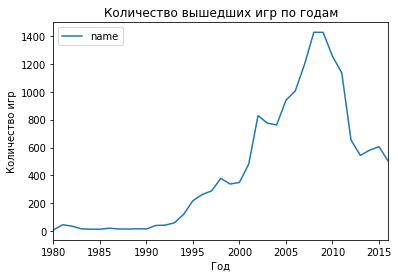

In [18]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count').plot(title='Количество вышедших игр по годам')
plt.xlabel('Год')
plt.ylabel('Количество игр')

По распределению виден пик в районе примерно 2008 года - количество вышедших игр в этом время превышает 1400 в год. Количество игр примерно до 1994 года держалось примерно на одном уровне - в эти года выходило сравнительно мало игр по сравнению с последующими. Переломной точкой можно назвать примерно 2000 год - после него количество выпускаемых игр не опускалось меньше 500.  <br/> Посмотрим на распределение в цифрах:

In [19]:
df.pivot_table(index = 'year_of_release', values = 'name', aggfunc='count')

,name
year_of_release,
1980,9
1981,46
1982,36
1983,17
1984,14
1985,14
1986,21
1987,16
1988,15


Из таблицы видно, что периодом с достаточным количеством игр можно считать 2001 год, более ранние данные можно назвать не важными. Т.е. данные за все периоды не важны.

---

Теперь посмотрим более внимательно на платформы, на которых выходили игры. Для начала выделим самые коммерчески успешные - т.е. те, для которых суммарно было больше всего продаж игр за всё время:

In [20]:
df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)

,total_sales
platform,
PS2,1233.56
X360,961.24
PS3,931.34
Wii,891.18
DS,802.78
PS,727.58
PS4,314.14
GBA,312.88
PSP,289.53


Выделим платформы с суммарными продажами за все годы более 100 млн. проданных копий. Платформы с меньшими продажами можно не учитывать при дальнейшем анализе, т.к. они представляют меньший интерес с точки зрения предсказания коммерческого успеха.   
Запишем платформы с высокими продажами в новую переменную и построим круговую диаграмму с распределением долей в процентах:

Text(0, 0.5, '')

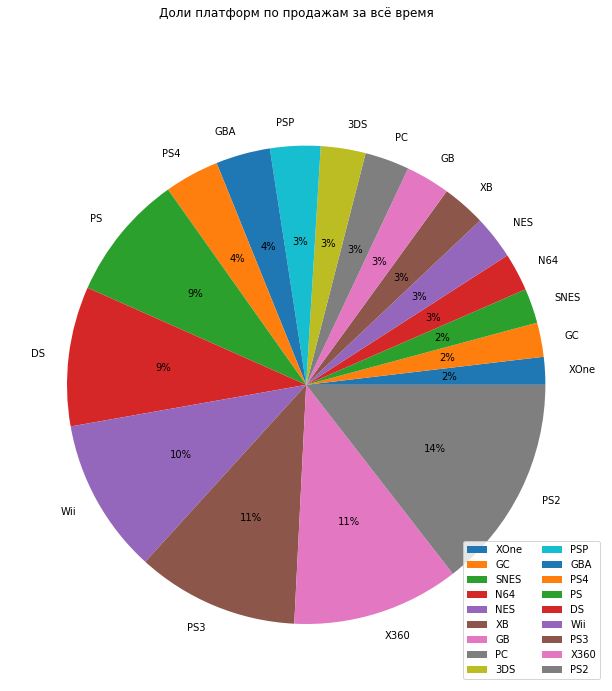

In [21]:
top_sales = df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').query('total_sales>100')
top_sales.sort_values(by='total_sales').plot(kind='pie', title='Доли платформ по продажам за всё время', figsize= (11,11), subplots=True, autopct='%1.0f%%')
plt.legend(loc = 'lower right', ncol = 2)
plt.ylabel('')

Text(0, 0.5, '')

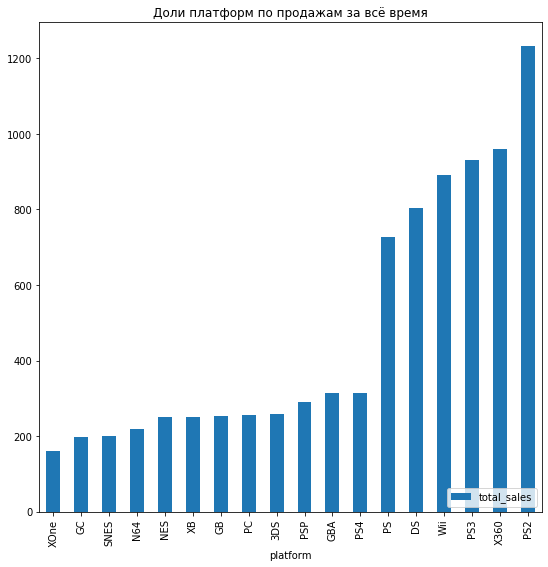

In [23]:
top_sales = df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').query('total_sales>100')
top_sales.sort_values(by='total_sales').plot(kind='bar', title='Доли платформ по продажам за всё время', figsize= (9,9))
plt.legend(loc = 'lower right', ncol = 2)
plt.ylabel('')

Лидер среди продаж - Play Station 2, более 1,2 млрд. проданных копий.   
Также по диаграмме и сводной таблице можно наблюдать переломный момент в борьбе Microsoft и Sony: Xbox360 с миниальным отрывом обошла PS3 по кол-ву проданных игр, данный тренд также подтверждается отчетностью по продажам самих приставок, а вот со следующего поколения консолей Play Station 4 сильно вырвалась вперёд - доля проданных копий превышает Xbox One в два раза.  
Также по значимим долям продаж можно выделить компанию Nintendo с её консолями DS и Wii - 9% и 10% по всем значениям соответственно.

---
Посмотрим на продолжительность жизни платформ - построим распределение по годам.    
Учитывать будем только платформы с большими суммарными продажами. Для этого создадим переменную с названиями платформ из прошлого графика и воспользуемся логической индексацией. За продолжительность жизни будем считать продажи по годам, т.е. годы, в которых игры на эту платформу ещё покупали - так будет дополнительно видна динамика по продажам.

Text(0, 0.5, 'Количество млн. проданных копий')

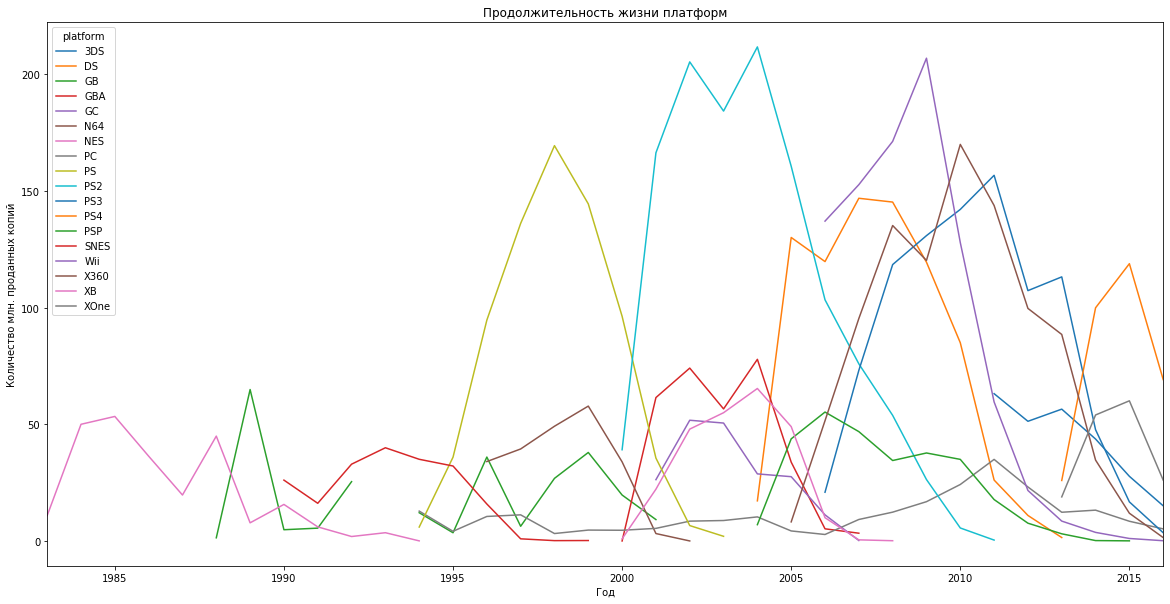

In [22]:
#Создаём список из названий платформ с высокими продажами:
top_platforms = top_sales.reset_index()['platform']

#С помощью логической индексации строим сводную таблицу и с неё выводим линейный график:
df.query('platform in @top_platforms').pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum').plot(title = 'Продолжительность жизни платформ', figsize=(20,10))
plt.xlabel('Год')
plt.ylabel('Количество млн. проданных копий')

Сформулируем ответ на вопрос: какова средняя продолжительность жизни у платформы?
Сгруппируем данные по годам выхода игр и посчитаем количество "лет жизни" для каждой платформы и посчитаем среднее и медианные значения по всем платформам

In [23]:
report = df.query('platform in @top_platforms').groupby(['platform','year_of_release']).agg({'total_sales':'sum'})
print(report.reset_index().groupby('platform').agg({'year_of_release':'nunique'}).median())
report.reset_index().groupby('platform').agg({'year_of_release':'nunique'}).mean()


year_of_release    10.5
dtype: float64


year_of_release    10.277778
dtype: float64

* Средний период жизни относительно прибыльных платформ - 10 лет.   
Для понимания трендов и прогнозирования интересен промежуток времени каждой платформы, в которой она показывает значимые коммерческие результаты, т.е. для неё продаётся больше определённого количества игр в год   
По предыдущему примеру посмотрим, сколько лет в среднем коммерчески успешные платформы показывают результат более 20 млн.копий в год:

In [24]:
report.reset_index().query('total_sales>20').groupby('platform').agg({'year_of_release':'nunique'}).mean()

year_of_release    5.777778
dtype: float64

По линейному графику можно заметить, что обычно жизненный цикл компании делится на два периода: рост и падение. Соответственно, актуальным периодом можно считать половину коммерчески успешного жизненного цикла или 3 года.   
Соответственно, для прогнозирования 2017 года, актуальным периодом будет начало 2014 года.

### Определение перспективных платформ

Повторим процедуру определения самых коммерчески успешных платформ, но уже в актуальном периоде, оставим в таблице данные начиная с 2014 года и перезапишем датасет:

In [25]:
df = df.query('year_of_release>=2014')

#смотрим суммарные продажи за 3 года:
df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales', ascending=False)


,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40
Wii,5.07


Оставим в датасете только платформы с суммарными продажами за актуальный период больше 20 млн. копий, перезапишем датасет.  
Также построим круговую диаграмму с распределениями долей:

In [26]:
top_sales = df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').query('total_sales>20')
top_platforms = top_sales.reset_index()['platform']
top_platforms

0     3DS
1      PC
2     PS3
3     PS4
4     PSV
5    WiiU
6    X360
7    XOne
Name: platform, dtype: object

,total_sales
platform,
PS4,288.15
XOne,140.36
3DS,86.68
PS3,68.18
X360,48.22
WiiU,42.98
PC,27.05
PSV,22.40


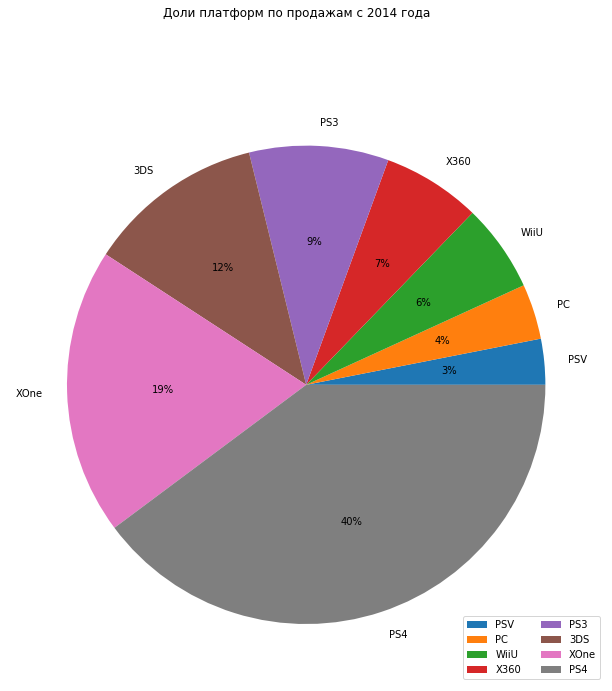

In [27]:
#создаём список с названиями популярных платформ:
top_sales = df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum').query('total_sales>20')
top_platforms = top_sales.reset_index()['platform']
top_platforms

#перезаписываем датасет:
df = df.query('platform in @top_platforms')

#строим круговую диаграмму:
top_sales = df.pivot_table(index='platform', values = 'total_sales', aggfunc='sum')
top_sales.sort_values(by='total_sales').plot(kind='pie', title='Доли платформ по продажам с 2014 года', figsize= (11,11), subplots=True, autopct='%1.0f%%')
plt.legend(loc = 'lower right', ncol = 2)
plt.ylabel('')

#выводим сводную таблицу:
top_sales.sort_values(by='total_sales', ascending = False)

В датасете осталось 8 платформ.  
По продажам за актуальный период с большим отрывом лидирует PS4 - почти 300 млн. проданных копий и 40% доли от общих продаж коммерчески успешных платформ. Затем с отрывом почти в 2 раза идёт Xbox One, затем с результатом почти 87 млн. идёт Nintendo 3DS. 

---
Посмотрим динамику продаж за три года:

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
year_of_release,,,,,,,,
2014,43.76,13.28,47.76,100.00,11.90,22.03,34.74,54.07
2015,27.78,8.52,16.82,118.90,6.25,16.35,11.96,60.14
2016,15.14,5.25,3.60,69.25,4.25,4.60,1.52,26.15


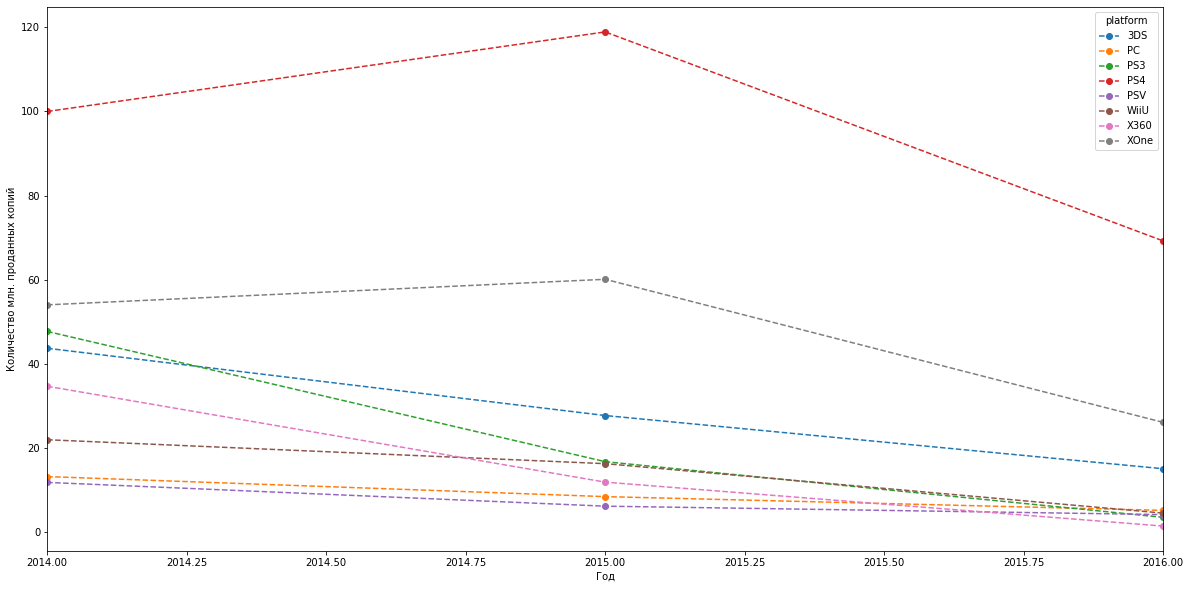

In [28]:
df.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum').plot(title = '', figsize=(20,10), marker='o', linestyle='dashed')
plt.xlabel('Год')
plt.ylabel('Количество млн. проданных копий')
df.pivot_table(index='year_of_release', columns = 'platform', values = 'total_sales', aggfunc='sum')

Абслютно все платформы в 2016 году показали худшие результаты, чем в 2014.   
Только PS4 и Xbox One в 2015 году улучшили результаты относительно предыдущего года.   
По суммарным продажам следует выделить 3 платформы: PS4, XOne и 3DS. Их можно считать потенциально прибыльными.

---
Помимо суммарных продаж по платформам также посмотрим на распределения по играм для каждой из них.   
Построим ящик с усами:

Text(0, 0.5, 'Млн. проданных копий')

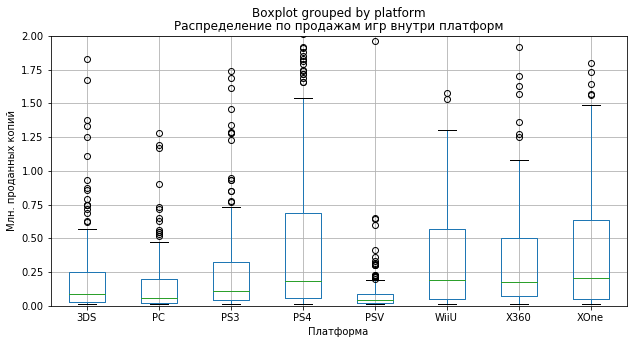

In [29]:
df.boxplot(column='total_sales', by='platform',figsize=(10,5))
plt.ylim(0,2)
plt.title('Распределение по продажам игр внутри платформ')
plt.xlabel('Платформа')
plt.ylabel('Млн. проданных копий')

По графику видно, что игры по 4 платформам имеют большее значение глобальных продаж: PS4, X360, XOne и WiiU.   
Самое высокое медианное значение у игр для приставки XOne - примерно 230 тыс. проданных копий по всему миру, далее с небольшим отрывом идут игры для WiiU, PS4 и X360.  
3DS в отличие от суммарных продаж при разбивке по играм занимает 6 место.    
Исходя их этих данных можно перспективными пожно считать платформы PS4, XOne и WiiU. <br/>  Xbox360 можно не рассматривать, т.к. это более раннее поколение, которое логично сменит XOne, хотя, фанаты и не все фанаты приставок Xbox спешат на него переходить.

Учитывая выводы по суммарным продажам перспективными можно считать 4 платформы: PS4, XOne, WiiU и 3DS.

### Влияние отзывов на продажи

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.   
Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

Влияние отзывов на продажи для платформы PS4


,total_sales,user_score,critic_score
total_sales,1.000000,-0.040132,0.402661
user_score,-0.040132,1.000000,0.546434
critic_score,0.402661,0.546434,1.000000





Влияние отзывов на продажи для платформы XOne


,total_sales,user_score,critic_score
total_sales,1.000000,-0.070384,0.428677
user_score,-0.070384,1.000000,0.440977
critic_score,0.428677,0.440977,1.000000





Влияние отзывов на продажи для платформы WiiU


,total_sales,user_score,critic_score
total_sales,1.000000,0.407926,0.370201
user_score,0.407926,1.000000,0.763536
critic_score,0.370201,0.763536,1.000000





Влияние отзывов на продажи для платформы 3DS


,total_sales,user_score,critic_score
total_sales,1.000000,0.215193,0.314117
user_score,0.215193,1.000000,0.862485
critic_score,0.314117,0.862485,1.000000


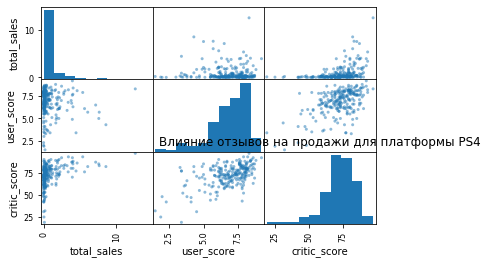

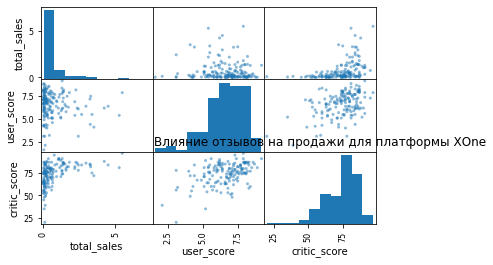

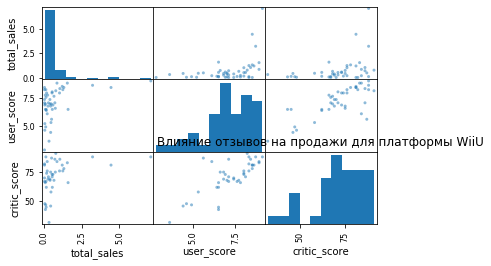

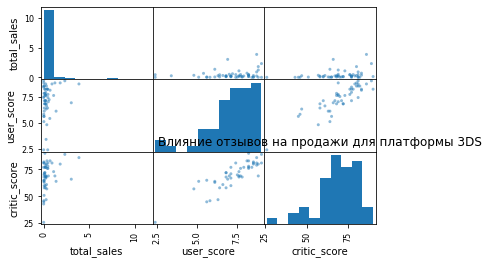

In [30]:
#Создаём список популярных платформ:
top_platforms = ['PS4', 'XOne', 'WiiU', '3DS']

#Пишем цикл, чтобы перебрать каждую платформу:
for i in top_platforms:
    #Название таблицы:
    print('Влияние отзывов на продажи для платформы', i)
    
    #Матрица корреляции:
    display(df.query('platform==@i')[['total_sales', 'user_score', 'critic_score']].corr())
    
    #Строим диаграмму рассеивания:
    pd.plotting.scatter_matrix(df.query('platform==@i')[['total_sales', 'user_score', 'critic_score']])
    plt.title('Влияние отзывов на продажи для платформы {}'.format(i))
    print()
    print()
    print()

На мартрице и графиках видна связь общих продаж и оценок критиков по всем 4 платформам. Корреляция слабо выражена и её нельзя назвать линейной. Тем не менее, по графикам видно что самые высокие продажи на платформах PS4, XOne и WiiU имеют высокие оценки критиков. На платформе 3DS видны высокие продажи игр со средними оценками критиков.  

Оценки пользователей оказывают незначительное влияние на продаже только на платформе WiiU. На платформе 3DS она выражена слабее, на PS4 и XOne она отсутствует.

### Распределение по жанрам

Посмотрим на распределение игрпо всем платформам по жанрам. Игр каких жанров больше и меньше всего?

,name
genre,
Action,607
Role-Playing,221
Adventure,180
Sports,159
Shooter,128
Misc,108
Racing,69
Fighting,60
Simulation,44


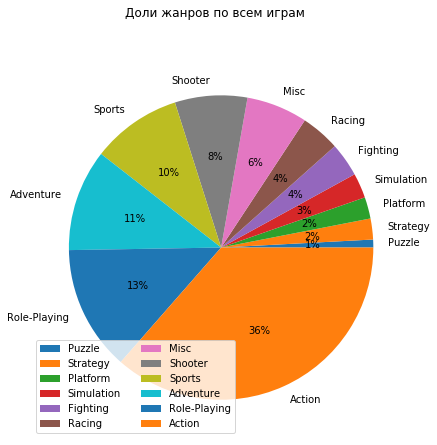

In [31]:
df.pivot_table(index='genre', values = 'name', aggfunc='count').sort_values(by='name').plot(kind='pie', title='Доли жанров по всем играм', figsize= (7,7), subplots=True, autopct='%1.0f%%')
plt.legend(loc = 'lower left', ncol = 2)
plt.ylabel('')
df.pivot_table(index='genre', values = 'name', aggfunc='count').sort_values(by='name', ascending=False)

Больше всего игр выходит в жанре Action, можно сказать что каждая третья игра выходит в этом жанре. На втором месте РПГ - 13% от общей доли, при этом она почти в три раза меньше по доли, чем лидер. Далее идут Adventure и Sports с 11 и 10 процентами соответсвтенно.   
Три самых редких жанра на рынке - Puzzle, Strategy и Platform: 1, 2 и 2 процента от общей доли.

---
Теперь посмотрим распределение по продажам внутри платформ. Сохранятся ли доли по коммерческому успеху?

,count,sum
,total_sales,total_sales
genre,,
Action,607,197.97
Shooter,128,170.94
Sports,159,108.83
Role-Playing,221,101.44
Misc,108,34.39
Fighting,60,28.22
Racing,69,27.52
Platform,38,18.09


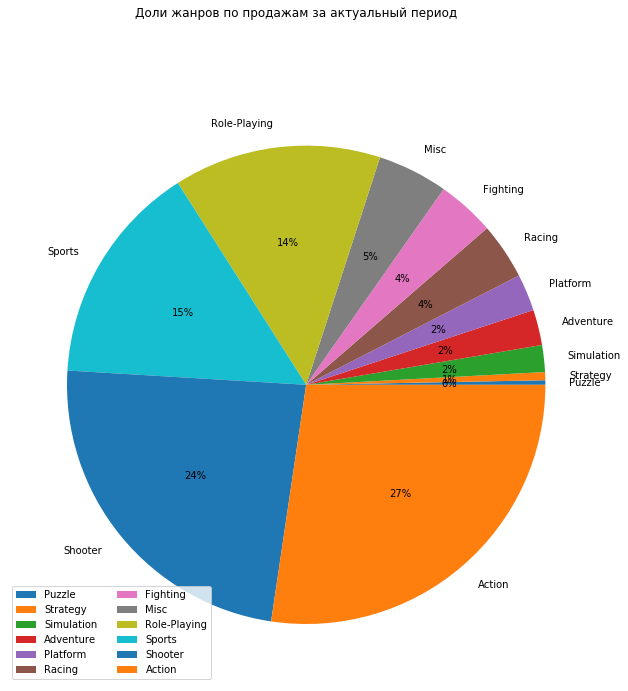

In [32]:
#Круговая диаграмма:
df.pivot_table(index='genre', values = 'total_sales', aggfunc='sum').sort_values(by='total_sales').plot(kind='pie', title='Доли жанров по продажам за актуальный период', figsize= (11,11), subplots=True, autopct='%1.0f%%')
plt.legend(loc = 'lower left', ncol = 2)
plt.ylabel('')

#Сводная таблица с количеством выпущенных игр и долей от продаж:
df.pivot_table(index='genre', values = 'total_sales', aggfunc=['count','sum']).sort_values(by=('sum', 'total_sales'), ascending=False)

По количеству проданных копий первенство сохранил жанр Action. На втором месте по продажам жанр Shooter - 24% от общего объёма продаж при 8% от общего количества игр (5 место). Третье место Sports - 15% продаж при 10% доли от общего количества игр( 4 место).   
Стратегии и пазлы также занимают последние места: их доля 1 процент и меньше одного процента соответственно.

---
Также посмотрим на график 'ящик с усами', чтобы посмотреть на распределение продаж по играм внутри жанра:

Text(0, 0.5, 'Млн. проданных копий')

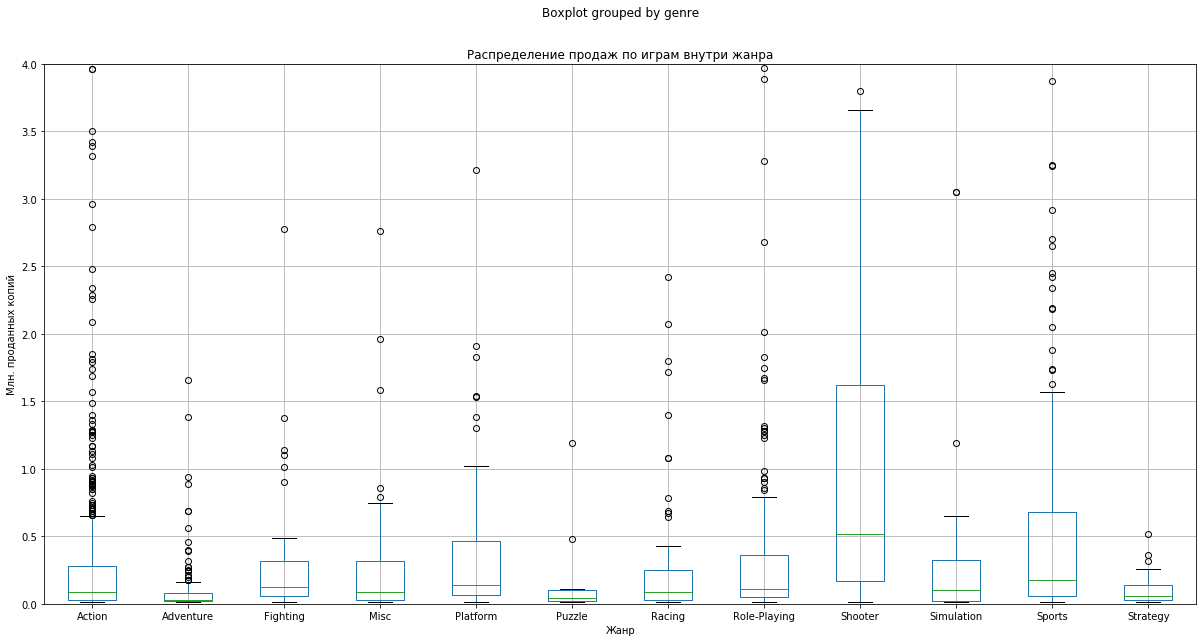

In [33]:
df.boxplot(column='total_sales', by='genre', figsize = (20,10))
plt.ylim(0,4)
plt.title('Распределение продаж по играм внутри жанра')
plt.xlabel('Жанр')
plt.ylabel('Млн. проданных копий')

На графике отчётливо видно как жанр Shooter опережает остальные по количеству проданных копий. Медианное значение по продажам этого жанра превышает полмиллиона копий. Однозначно его можно рассматривать как самый прибыльный.  
На втором месте жанр Sports - примерно 200 тысяч проданных копий по всему миру.   
Далее идут жанры Platform, Fighting и Role-Playing.

### Вывод

Исследовательский анализ показал следующее: 
* Для исследовании не важны данные за всё время
* Период жизни коммерчески успешной платформы - в среднем 10 лет.
* Актуальным периодом выбран промежуток в 3 года. В дальнейшем анализе будут использоватья данные с 2014 года.
* Перспективными можно считать платформы `PS4`, `XOne`, `WiiU`, `3DS`.
* Оценки критиков имеют слабо выраженное влияние на продажи. Оценки пользователей не оказывают влияние на продажи.
* Самые прибыльные жанры: `Shooter`, `Action` и `Sports`.

## Портрет пользователя каждого региона
### Определение самых популярных платформ

Определим самые популярные платформы  для пользователя каждого региона (NA, EU, JP). Построим сводные таблицы и круговые диаграммы:

In [34]:
display(df.pivot_table(index = 'platform', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False))
display(df.pivot_table(index = 'platform', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False))
df.pivot_table(index = 'platform', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,na_sales
platform,
PS4,98.61
XOne,81.27
X360,28.30
3DS,22.64
PS3,22.05
WiiU,19.36
PC,7.23
PSV,2.52


,eu_sales
platform,
PS4,130.04
XOne,46.25
PS3,25.54
PC,17.97
3DS,16.12
X360,15.49
WiiU,13.15
PSV,3.53


,jp_sales
platform,
3DS,44.24
PS4,15.02
PSV,14.54
PS3,11.22
WiiU,7.31
XOne,0.32
X360,0.08
PC,0.00


Text(0, 0.5, '')

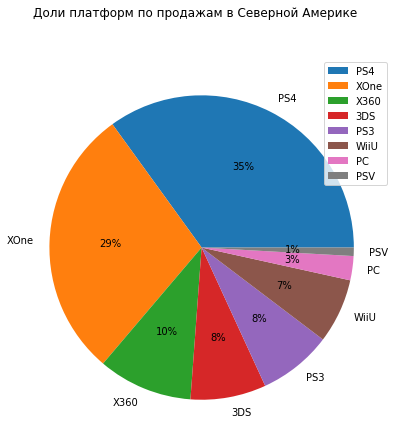

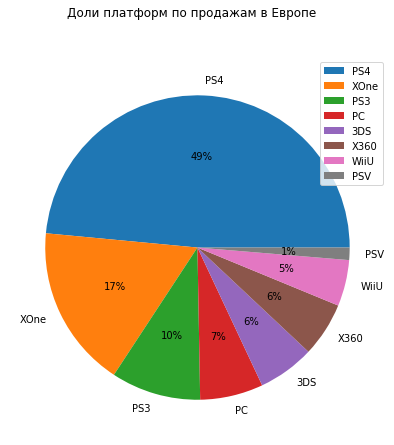

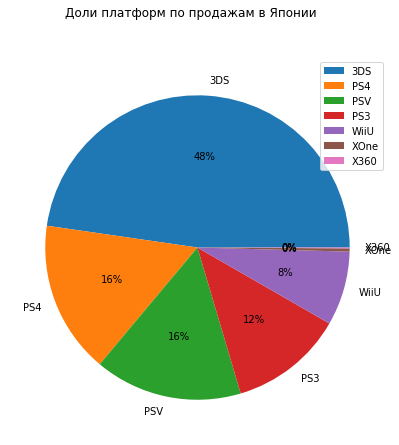

In [35]:
df.pivot_table(index = 'platform', values='na_sales',
               aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='pie',
                                                                              subplots=True, title='Доли платформ по продажам в Северной Америке',
                                                                              figsize= (7,7), autopct='%1.0f%%')
plt.ylabel('')
df.pivot_table(index = 'platform', values='eu_sales',
               aggfunc='sum').sort_values(by='eu_sales',ascending=False).plot(kind='pie',
                                                                              subplots=True, title='Доли платформ по продажам в Европе',
                                                                              figsize= (7,7), autopct='%1.0f%%')
plt.ylabel('')

df.pivot_table(index = 'platform', values='jp_sales',
               aggfunc='sum').sort_values(by='jp_sales',ascending=False).plot(kind='pie',
                                                                              subplots=True, title='Доли платформ по продажам в Японии',
                                                                              figsize= (7,7), autopct='%1.0f%%')
plt.ylabel('')

Построим сводную таблицу по суммарным продажам для всех трёх регионов:

In [36]:
df.pivot_table(index = 'platform', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')

,eu_sales,jp_sales,na_sales
platform,,,
3DS,16.12,44.24,22.64
PC,17.97,0.00,7.23
PS3,25.54,11.22,22.05
PS4,130.04,15.02,98.61
PSV,3.53,14.54,2.52
WiiU,13.15,7.31,19.36
X360,15.49,0.08,28.30
XOne,46.25,0.32,81.27


* Для Северной Америки:
1-ое место: PS4 с долей 35%
2-ое место: XOne с долей 29%
3-е место: X360 с долей 10%
4-е место: 3DS с долей 8%
5-е место: PS3 с долей 8% 

* Для Европы:
1-ое место: PS4 с долей 49%
2-ое место: XOne с долей 17%
3-е место: PS3 с долей 10%
4-е место: PC с долей 7%
5-е место: 3DS с долей 6% 

* Для Японии: 
1-ое место: 3DS с долей 48%
2-ое место: PS4 с долей 16%
3-е место: PSV с долей 16%
4-е место: PS3 с долей 12%
5-е место: WiiU с долей 8% 

---
Можно наблюдать схожесть в трендах Северной Америки и Европы - первое и второе место в этих регионах одинаково занимают PS4 и XOne. При этом в Европе отставание второго места от первого гораздо сильнее - доля PS4 больше почти в три раза, а в Америке разница всего 6%. В целом 4 из 5 самых популярных приставок в этих регионах одинаковы, единственное отличие в одной платформе - в Америке это XBox360, а в Европе ПК.

Япония же кардинально отличается как по набору лидируещих приставок, так и по распределению долей. Лидирует тут портативная 3DS, в то время как в остальных регионах она занимает 4-ое и 5-ое место.

В целом можно сказать что в Америке и Японии любят "отечественные" приставки: в Японии весь топ-5 продаж - это игры японских консолей, а в Америке третье место занимает старая версия Xbox, хотя в топ-5 других регионов она не входит.

### Определение самых популярных жанров
Посмотрим на распределение долей продаж по жанрам, повторим предыдущие действия:

In [37]:
display(df.pivot_table(index = 'genre', values='na_sales', aggfunc='sum').sort_values(by='na_sales',ascending=False))
display(df.pivot_table(index = 'genre', values='eu_sales', aggfunc='sum').sort_values(by='eu_sales',ascending=False))
df.pivot_table(index = 'genre', values='jp_sales', aggfunc='sum').sort_values(by='jp_sales',ascending=False)

,na_sales
genre,
Shooter,79.02
Action,72.10
Sports,45.98
Role-Playing,33.47
Misc,13.59
Fighting,12.43
Racing,8.74
Platform,6.79
Adventure,5.60


,eu_sales
genre,
Action,74.01
Shooter,65.52
Sports,45.36
Role-Playing,28.17
Racing,14.13
Misc,11.44
Simulation,7.30
Platform,6.80
Fighting,6.69


,jp_sales
genre,
Role-Playing,31.16
Action,29.38
Fighting,6.37
Misc,5.59
Shooter,4.87
Adventure,3.55
Sports,3.17
Platform,2.69
Simulation,2.31


Text(0, 0.5, '')

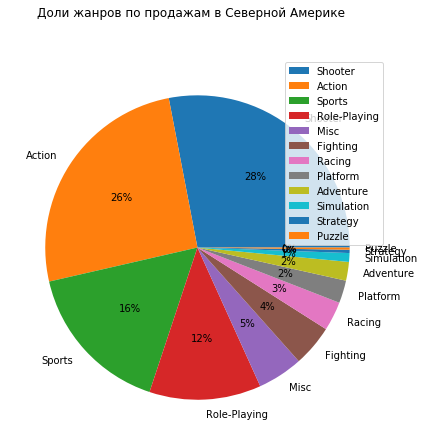

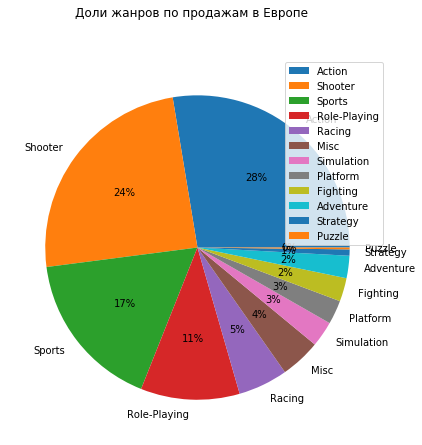

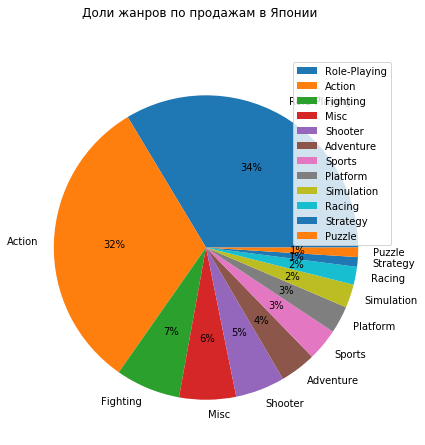

In [38]:
df.pivot_table(index = 'genre', values='na_sales',
               aggfunc='sum').sort_values(by='na_sales',ascending=False).plot(kind='pie',
                                                                              subplots=True, title='Доли жанров по продажам в Северной Америке',
                                                                              figsize= (7,7), autopct='%1.0f%%')
plt.ylabel('')
df.pivot_table(index = 'genre', values='eu_sales',
               aggfunc='sum').sort_values(by='eu_sales',ascending=False).plot(kind='pie',
                                                                              subplots=True, title='Доли жанров по продажам в Европе',
                                                                              figsize= (7,7), autopct='%1.0f%%')
plt.ylabel('')

df.pivot_table(index = 'genre', values='jp_sales',
               aggfunc='sum').sort_values(by='jp_sales',ascending=False).plot(kind='pie',
                                                                              subplots=True, title='Доли жанров по продажам в Японии',
                                                                              figsize= (7,7), autopct='%1.0f%%')
plt.ylabel('')

* Для Северной Америки:
1-ое место: Shooter с долей 28%
2-ое место: Action с долей 26%
3-е место: Sports с долей 16%
4-е место: Role-Playing с долей 12%
5-е место: Misc с долей 5% 

* Для Европы:
1-ое место: Action с долей 28%
2-ое место: Shooter с долей 24%
3-е место: Sports с долей 17%
4-е место: Role-Playing с долей 11%
5-е место: Racing с долей 5% 

* Для Японии: 
1-ое место: Role-Playing с долей 34%
2-ое место: Action с долей 32%
3-е место: Fighting с долей 7%
4-е место: Misc с долей 6%
5-е место: Shooter с долей 5% 

---
По жанрам также можно сказать что Европа и Америка очень похожи по вкусам: первые 4 платформы одинаковые(кроме первых мест) с очень близкими долями.    
Япония также отличается: РПГ здесь на первом месте, а Shooter на 5ом с долей всего 5%, хотя в двух других регионах это топовый жанр.

### Влияние рейтинга ESRB на продажи в отдельном регионе
Посмотрим, влияет ли рейтинг на продажи в разных регионах: построим ящик с усами для каждого региона:

В начале заполним пропуски в столбце с рейтингом на значение "не определён", иначе график будет построен некорректно:

In [39]:
df['rating']=df['rating'].fillna('не определён')

(0, 1.3)

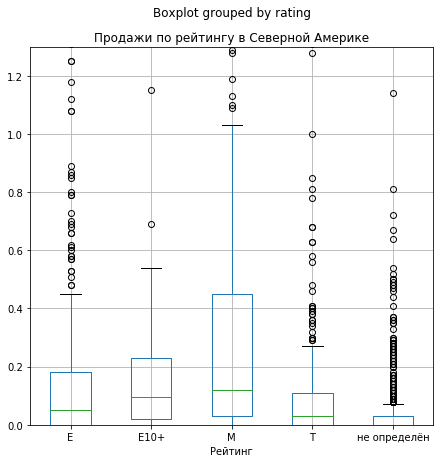

In [40]:
df.boxplot(column='na_sales', by='rating', figsize =(7,7))
plt.title('Продажи по рейтингу в Северной Америке')
plt.xlabel('Рейтинг')
plt.ylim(0,1.3)

(0, 1)

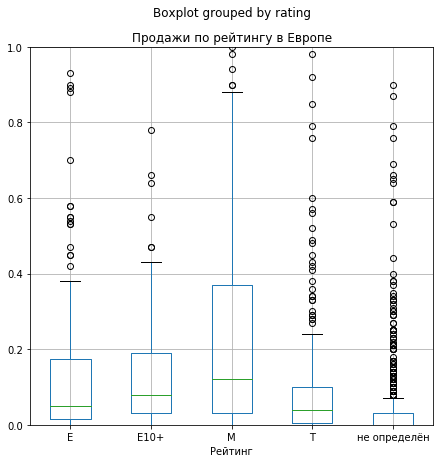

In [41]:
df.boxplot(column='eu_sales', by='rating', figsize =(7,7))
plt.title('Продажи по рейтингу в Европе')
plt.xlabel('Рейтинг')
plt.ylim(0,1)

(0, 0.16)

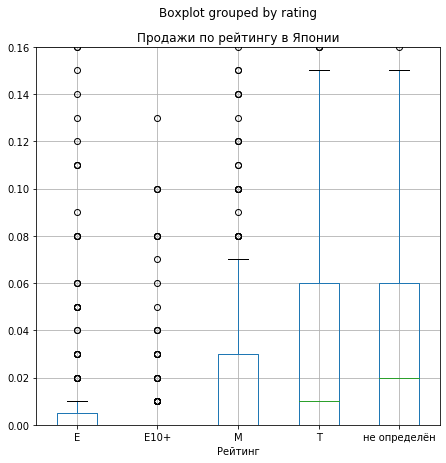

In [42]:
df.boxplot(column='jp_sales', by='rating', figsize =(7,7))
plt.title('Продажи по рейтингу в Японии')
plt.xlabel('Рейтинг')
plt.ylim(0,0.16)

Снова тенденция "похожести" Европы и Северной Америки сохраняется - в этих регионах заметно лидируют игры 17+, на втором месте 10+, затем игры для всех и на 4ом месте игры для тинейжеров.   
Япония опять стоит особняком - здесь лидируют игры без рейтинга. Этому может быть два объяснения: 
1) Глобальная проблема при выгрузке в столбце с жанром - необходимо проверить алгоритм выгрузки
2) В Японии своя система рейтингов, отличная от ESRB

### Вывод

* Для Северной Америки и Европы самые популярные платформы это PS4 и XOne, а жанры - Shooter и Action. Больше всего продаются игры 17+ и 10+.

* Для Японии топ-3 приставки это 3DS, PS4 и PSV, жанры - Role-Playing и Action. Необходимо проверить предположение о собственной системе рейтингов для этого региона.



## Проверка гипотез

Проверим две гипотезы:
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Нулевые гипотезы сформулируем так:
* Средняя пользовательские рейтинги двух исследуемых выборок равны.

По скольку при проверке обоих гипотез нам нужно будет сравнить средние из двух выборок оба раза применим метод`scipy.stats.ttest_ind()`. 
Посмотрим на размеры выборок:

In [43]:
print(len(df.query('platform=="XOne"')['user_score']))
print(len(df.query('platform=="PC"')['user_score']))
print(len(df.query('genre=="Action"')['user_score']))
len(df.query('genre=="Sports"')['user_score'])

228
151
607


159

Так как размеры выборок отличаются, а также мы не можем быть уверены в том, что дисперсия генеральных совокупностей равно, передадим параметру `equal_var` значение `False`. Значение `alpha` выберем 0.05. 

По скольку данный тест чувствителен к пропускам, перед тестом удалим все строки, в которых значение пользовательского рейтинга пропущено.

In [44]:
df=df.dropna(subset=['user_score'])

In [45]:
results = st.ttest_ind(df.query('platform=="XOne"')['user_score'], df.query('platform=="PC"')['user_score'], equal_var=False)

alpha = .05 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  0.11601398086668827
Не получилось отвергнуть нулевую гипотезу


P-value говорит нам о том, что вероятность получить такие же, или более выраженное отличия между средними двух выборок равна 11,6%. Это значение слишком высоко, чтобы отвергнуть нулевую гипотезу.
Построим графики распределений по значениям:

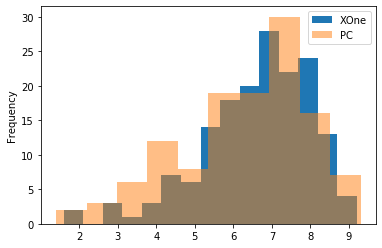

In [46]:
df.query('platform=="XOne"')['user_score'].plot(kind='hist', bins=15, legend=True, label='XOne')
df.query('platform=="PC"')['user_score'].plot(kind='hist', legend=True, label='PC',alpha=0.5)


Распределения в общих чертах выглядят похоже, нет оснований усомнится в том, что средние рейтинги двух платформ одинаковы.

---
Перейдём к средним пользовательским рейтингам по жанрам:

In [47]:
results = st.ttest_ind(df.query('genre=="Action"')['user_score'], df.query('genre=="Sports"')['user_score'], equal_var=False)

alpha = .05 

print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  2.132579125573844e-14
Отвергаем нулевую гипотезу


Вероятность того, что в генеральной совокупности средние рейтинги жанров Action и Sports равны практически нулевая.   
Построим графики распределений по значениям:

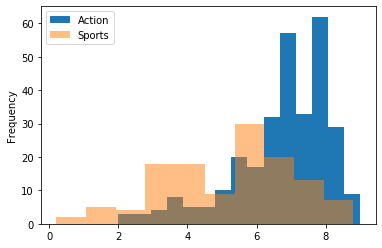

In [48]:
df.query('genre=="Action"')['user_score'].plot(kind='hist', bins=15, legend=True, label='Action')
df.query('genre=="Sports"')['user_score'].plot(kind='hist', legend=True, label='Sports',alpha=0.5)


Распределения сильно отличаются, можно уверенно заявить что средние двух жанров не равны.

### Вывод


* Во время предобработки данных названия столбцов были приведены к нижнему регистру.  
Обнаружены нулевые значения в столбацах с названием, годом выхода, жанром, оценкой пользователя, критиков и рейтингом. В первых трёх столбцах пропуски были удалены. Причина появления пропусков значений может быть обусловлена человеческим фактором, либо носить системный характер при выгрузке. Необходимо сформировать отчёт об ошибке для команды разработчиков, ответственных за выгрузку.
Причина появления нулевых значений может быть обусловлена ошибками сети, либо носить системный характер при выгрузке.    
Столбец с годом выпуска приведён к целочисленному типу, столбец с оценкой пользователей - к типу с плавающей точкой.
В столбце с рейтингом найдены и заменены дубликаты,  а также значение `RP` заменены на пропуски
В таблицу добавлен столбец с суммарными продажами по всем регионам

* В ходе исследовательского анализа был определён актуальный период для анализа и дальнейшего прогноза - 3 года.  
Перспективные платформы: `PS4`, `XOne`, `WiiU`, `3DS`.
Самые прибыльные жанры: `Shooter`, `Action` и `Sports`.

* Так же в ходе ИА были описаны распределения и описан портрет среднего пользователя каждого из трёх регионов - для Северной Америки и Европы это игрок, чаще всего играющий на приставках PS4 и XOne  в жанры Shooter и Action. Больше всего в этих регионах  продаются игры 17+ и 10+.
Для Японии это игрок в портати приставки это 3DS, PS4 и PSV, жанры - Role-Playing и Action. Необходимо проверить предположение о собственной системе рейтингов для этого региона.

* По результатам проверки двух гипотез можно заключить следующее:

1. Не было найдено значимых различий средних пользовательских рейтингов платформ Xbox One и PC

2. Средние пользовательские рейтинги жанров Sports и Action не равны. По графикам явно видно победу жанра Action.

Исследование можно считать завершенным.